<div style="background-color: #ffffff; color: #000000; padding: 10px;">
<div style="display: flex; justify-content: space-between; align-items: center; background-color: #ffffff; color: #000000; padding: 10px;">
    <img src="../images/logo_kisz.png" height="80" style="margin-right: auto;" alt="Logo of the AI Service Center Berlin-Brandenburg.">
    <img src="../images/logo_bmbf.jpeg" height="150" style="margin-left: auto;" alt="Logo of the German Federal Ministry of Education and Research: Gefördert vom Bundesministerium für Bildung und Forschung.">
</div>
<h1> Efficient Information Retrieval from Documents
<h2> Local Retrieval Augmented Generation System
</div>

<div style="background-color: #f6a800; color: #ffffff; padding: 10px;">
    <h2> Part 2 - Improve Results with Query Transformation

Query transformations are a set of approaches focused on re-writing and / or modifying questions for retrieval.

<div style="background-color: #dd6108; color: #ffffff; padding: 10px;">
<h3>1. Multi Query</h3>
</div>

**Multi Query** is a query transformation technique used to improve the quality and diversity of retrieved documents.

- **Goal**: To increase retrieval recall by generating multiple semantically varied versions of a user's question.
- **Method**: An *LLM* is used to create *slightly different rephrasings* of the original query.
- **Retrieval**:
  - Each rephrased query is independently sent to the vector database.
  - *All* retrieved documents across queries are aggregated.
- **Generation**: The combined set of documents is passed to the LLM to generate the final answer.

> *This technique helps capture different aspects of the user's intent, potentially retrieving documents that would be missed by a single query.*


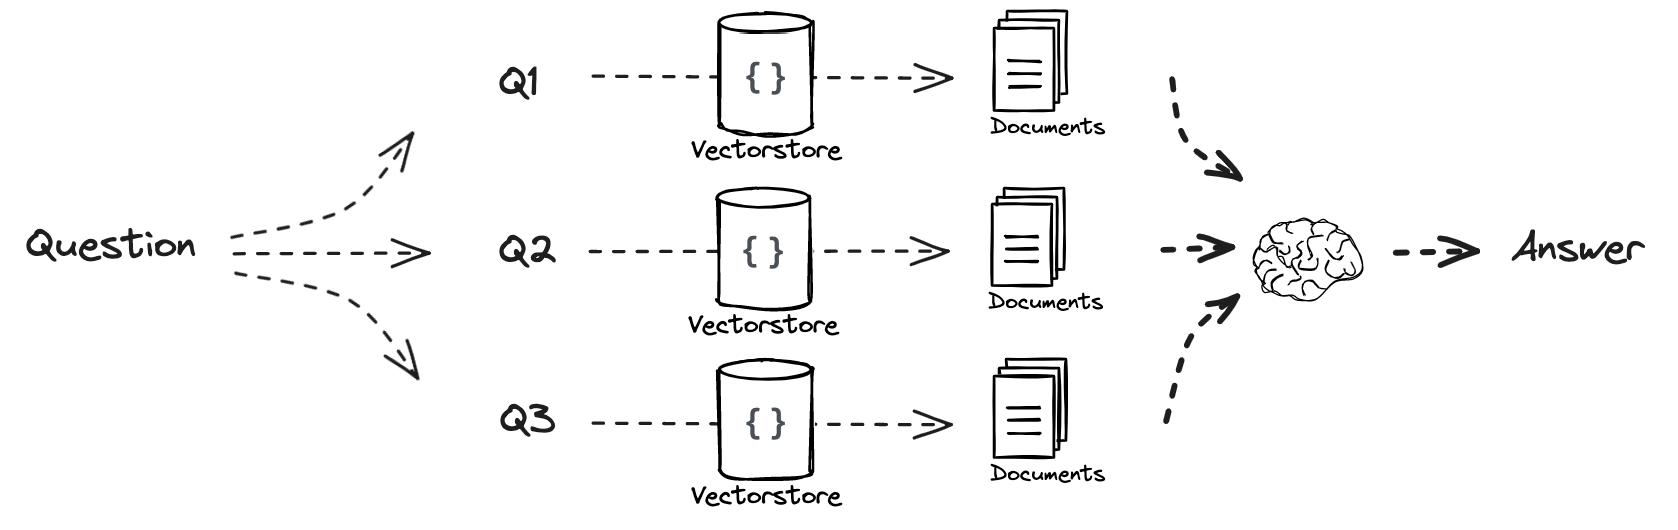

<div style="background-color: #dd6108; color: #ffffff; padding: 10px;">
<h3>2. RAG-Fusion</h3>
</div>

**RAG-Fusion** is a query transformation technique designed to improve retrieval robustness by combining results from multiple types of queries.

- **Goal**: To balance precision and recall by fusing retrieval results from different query perspectives.
- **Method**:
  - Generate multiple query variants using different prompting strategies (e.g., one original question, one reformulated for specificity, another for breadth).
- **Retrieval**:
  - Perform separate retrievals for each query variant.
  - Merge and de-duplicate the retrieved document sets.
- **Scoring**:
  - Documents are re-ranked, often based on a weighted or learned scoring function.
- **Generation**:
  - The top-ranked, merged documents are passed to the LLM for answer generation.

**RAG-Fusion** improves performance in scenarios where a single query formulation might miss important context or nuances.


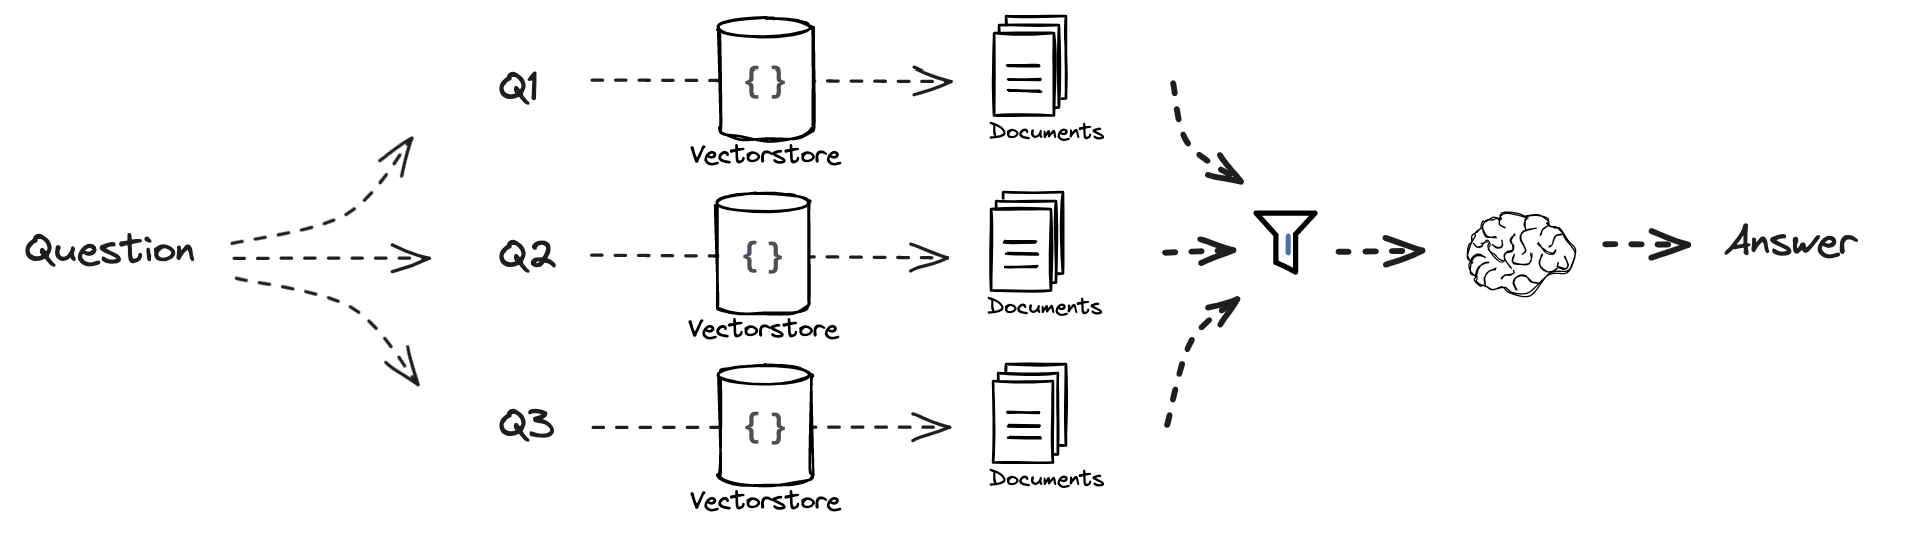

Blog / repo: 

* https://towardsdatascience.com/forget-rag-the-future-is-rag-fusion-1147298d8ad1

<div style="background-color: #dd6108; color: #ffffff; padding: 10px;">
<h3>3. Decomposition</h3>
</div>

**Decomposition**, also known as **Least-to-Most Prompting**, is a query transformation technique rooted in the principles of **Chain-of-Thought (CoT) prompting**.

- **Goal**: 
  - To enhance generalization to harder problems by systematically simplifying the reasoning process.

- **Key Idea**:
  - Break down a complex problem into a series of simpler subproblems.
  - Solve the subproblems one at a time, in sequence.
  - Each subproblem can leverage the solution of the previous one to inform the next step.

- **Method**:
  1. **Decompose** the original query into smaller, manageable subqueries.
  2. **Retrieve** relevant information for each subquery as needed.
  3. **Solve** subqueries sequentially, building up to a full solution.
  4. **Generate** the final answer by combining intermediate results.

This technique is particularly effective in tasks that require multi-step reasoning, planning, or the combination of different knowledge pieces.


### Answer recursively  

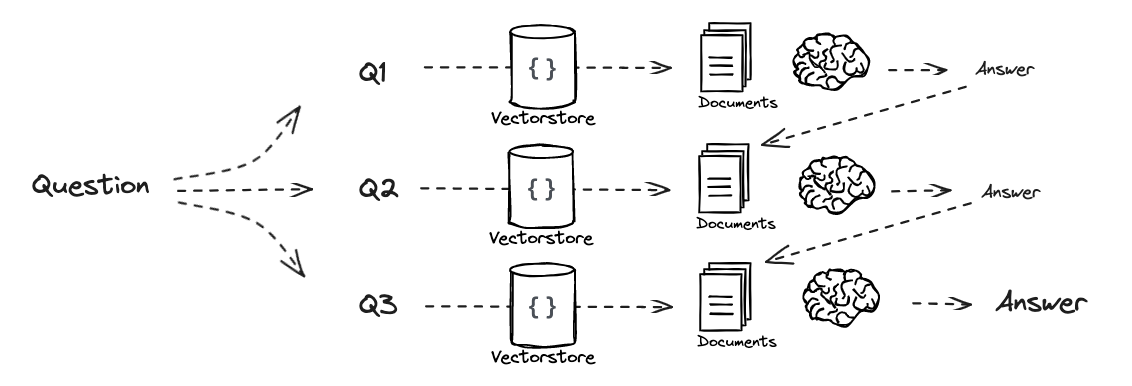

Papers:

* https://arxiv.org/pdf/2205.10625.pdf
* https://arxiv.org/abs/2212.10509.pdf

### Answer individually 

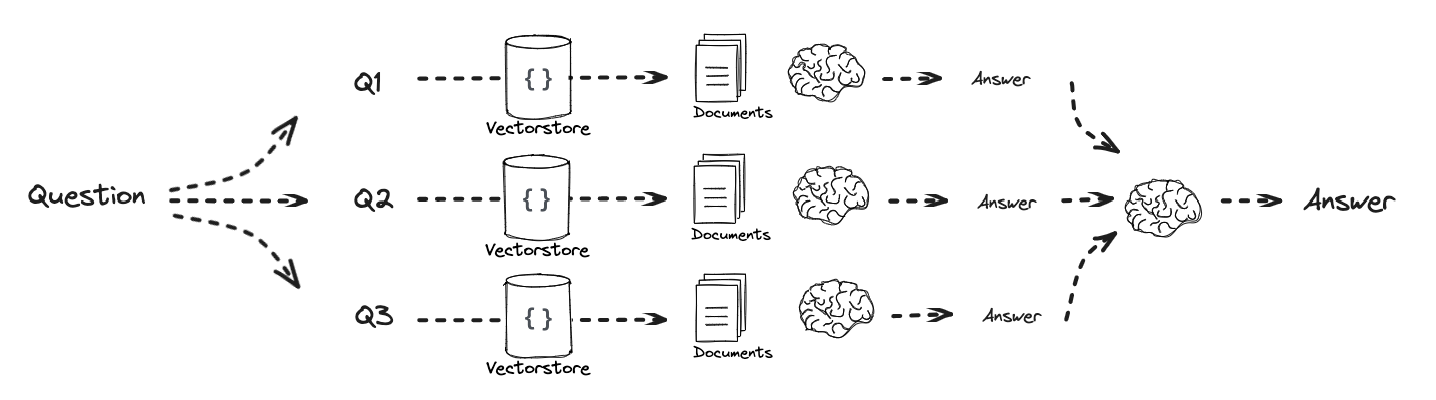

This is a query transformation technique that decomposes a complex question into smaller subproblems, solves them independently, and then synthesizes the final answer from the individual results.

- **Goal**: 
  - To improve accuracy and modularity by isolating components of a complex query and addressing them one at a time.

- **Method**:
  1. **Decompose** the original prompt into a set of smaller, focused subproblems.
  2. **Solve** each subproblem independently, without relying on intermediate context or chaining.
  3. **Aggregate** the individual answers to construct a response to the original, overarching question.

- **Distinguishing Feature**:
  - Unlike *least-to-most prompting*, this approach does not rely on sequential dependencies between subproblems. Each is treated as an independent unit of reasoning.


<div style="background-color: #dd6108; color: #ffffff; padding: 10px;">
<h3>4. Step Back</h3>
</div>

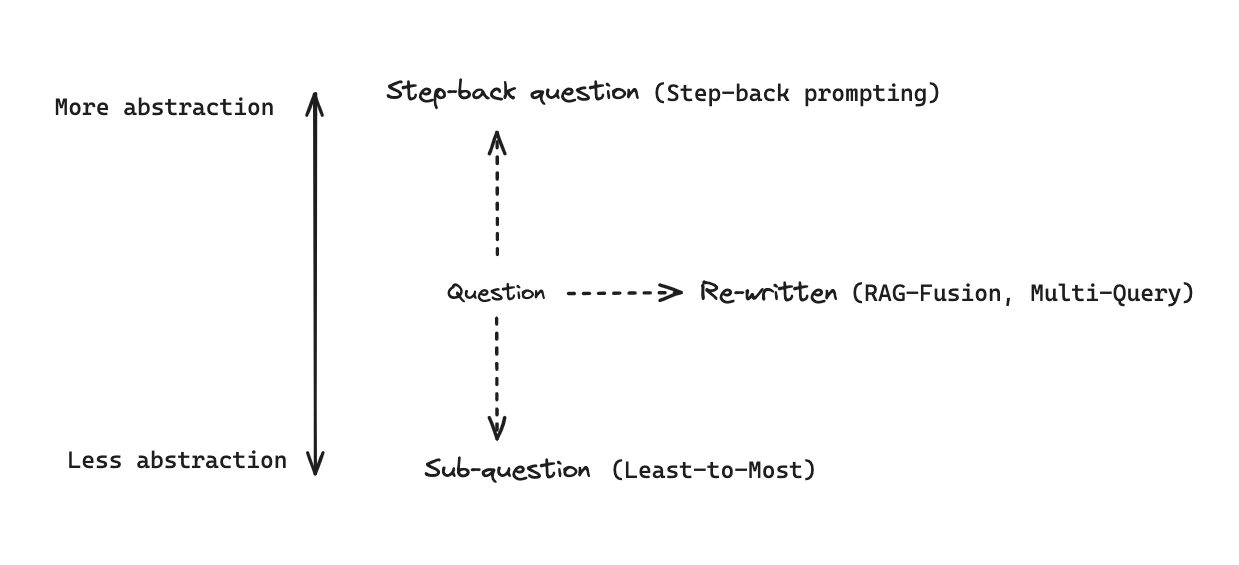

Paper: 

* https://arxiv.org/pdf/2310.06117.pdf

**Step-Back Prompting** is a query transformation technique that encourages LLMs to reason at a higher level of abstraction by reformulating specific queries into more general ones.

- **Goal**:  
  - To derive *first principles* or *high-level concepts* from detailed, instance-specific prompts.

- **Key Idea**:  
  - Instead of solving the original prompt directly, the model is first asked to "step back" and consider a more abstract version of the problem.
  - This abstraction allows the model to reason beyond surface details and apply broader conceptual understanding.

- **Method**:
  1. **Abstract**: Reformulate the original, detail-rich prompt into a more general or conceptual version.
  2. **Reflect**: Use the abstracted formulation to guide the model's reasoning.
  3. **Apply**: Map the generalized insight back to the original, specific context to generate a final answer.


<div style="background-color: #dd6108; color: #ffffff; padding: 10px;">
<h3>5. HyDE</h3>
</div>

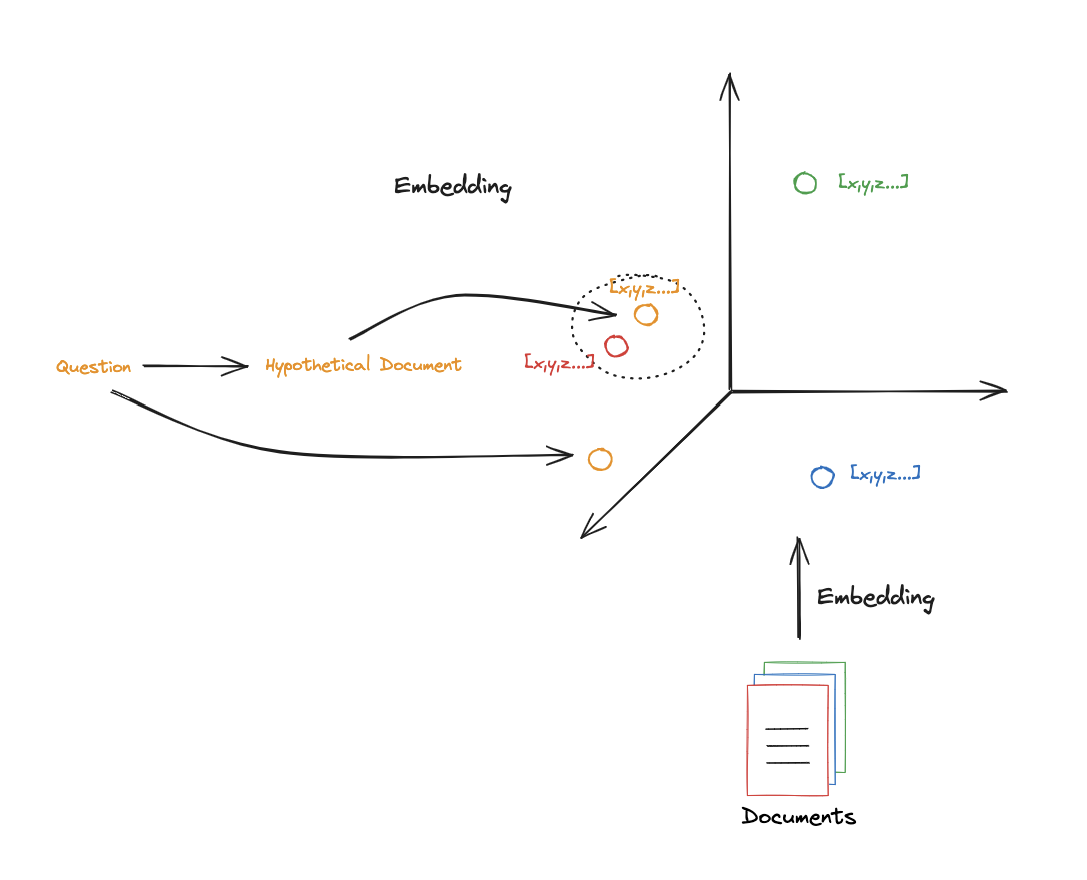

Paper:

* https://arxiv.org/abs/2212.10496

**HyDE** stands for **Hypothetical Document Embeddings**, a retrieval technique that improves search performance by generating a *hypothetical answer* before retrieval, rather than using the original query directly.

- **Goal**:  
  - To enhance the retrieval process by embedding the *semantic intent* of a query more effectively.

- **Key Idea**:
  - Instead of embedding the user’s original question, use an LLM to generate a plausible answer (a “hypothetical document”).
  - This hypothetical answer is then embedded and used to retrieve relevant documents from the vector store.

- **Method**:
  1. **Generate**: Use a language model to create a hypothetical answer to the original query.
  2. **Embed**: Convert this hypothetical document into an embedding vector.
  3. **Retrieve**: Use this vector to query the vector database for similar real documents.
  4. **Generate**: Use the retrieved documents to answer the original query.

- **Benefits**:
  - Embedding a plausible answer often better captures the *semantic intent* of the query than the original question.
  - Particularly useful for open-ended or underspecified queries.

HyDE leverages the generative capabilities of LLMs not just for answering questions, but also to improve the retrieval step that precedes generation.